In [72]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [118]:
DATA_PATH = Path.cwd().parent.joinpath('data', 'processed')

returns_data = pd.read_table(DATA_PATH.joinpath('performance_data.txt'), parse_dates={'date': ['year', 'month']})
weights_data = pd.read_table(DATA_PATH.joinpath('weights_data.txt'), parse_dates={'date': ['year', 'month']})
weights_data = weights_data.fillna(0)

In [79]:
mean = returns_data.actual_ret.mean()
std = returns_data.actual_ret.std()
print(f'Actual:\t\t{mean:.4f} ({std:.4f}) ({mean-1.96*std:.4f}, {mean+1.96*std:.4f})')

mean = returns_data.expected_ret.mean()
std = returns_data.expected_ret.std()
print(f'Expected:\t{mean:.4f} ({std:.4f}) ({mean-1.96*std:.4f}, {mean+1.96*std:.4f})')

mean = returns_data.sharpe.mean()
std = returns_data.sharpe.std()
print(f'Sharpe Ratio:\t{mean:.4f} ({std:.4f}) ({mean-1.96*std:.4f}, {mean+1.96*std:.4f})')

Actual:		0.0120 (0.0771) (-0.1390, 0.1631)
Expected:	0.2637 (0.1279) (0.0131, 0.5144)
Sharpe Ratio:	0.3527 (0.2292) (-0.0966, 0.8020)


### Actual and Expected Returns

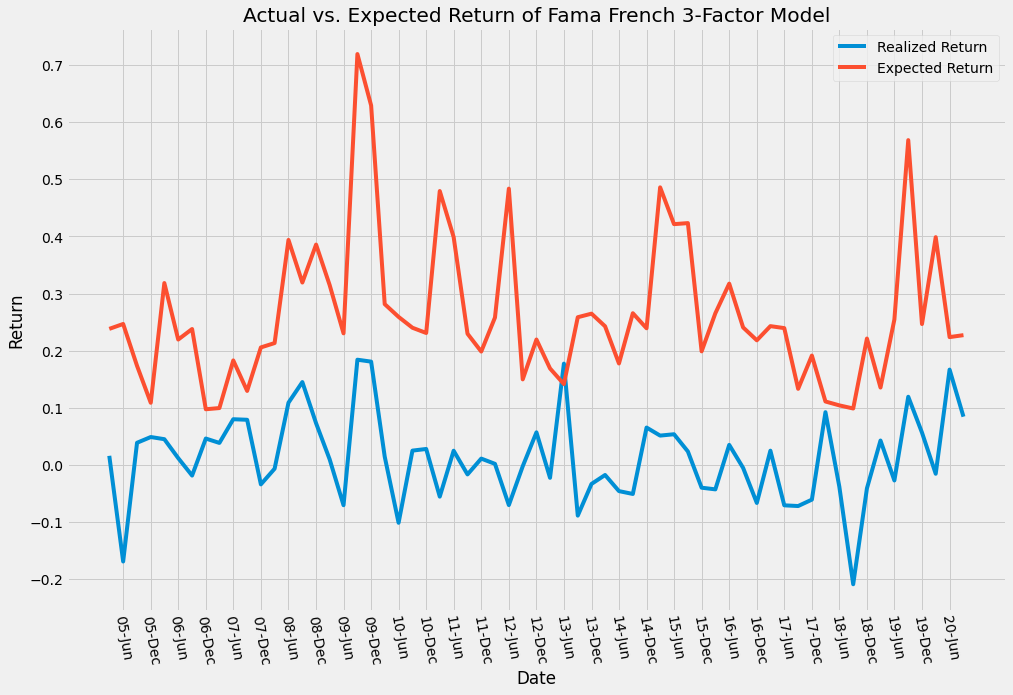

In [117]:
fig = plt.figure(figsize=(15,10))
plt.plot(returns_data.date, returns_data.actual_ret, label='Realized Return')
plt.plot(returns_data.date, returns_data.expected_ret, label='Expected Return')
plt.title('Actual vs. Expected Return of Fama French 3-Factor Model')
plt.legend()
plt.ylabel('Return')
plt.xlabel('Date')
plt.yticks(np.arange(-0.2, 0.8, 0.1))
plt.xticks(returns_data.date[1::2], labels=returns_data.date[1::2].dt.strftime('%y-%b'), rotation=-80)
plt.show()

### Portfolio Alpha

In [140]:
alphas = list()
for dt in weights_data.date:
    file = dt.strftime('%Y.%m.txt')
    df = pd.read_table(DATA_PATH.joinpath('factor_data', 'alphas', file))
    subset = weights_data[weights_data.date==dt].drop('date', axis=1).T
    subset.columns = ['weight']
    subset = subset.merge(df, how='left', left_index=True, right_on='tic')
    subset = subset[subset.weight!=0]
    a = (subset.weight * subset.alpha).sum()
    alphas.append(a)

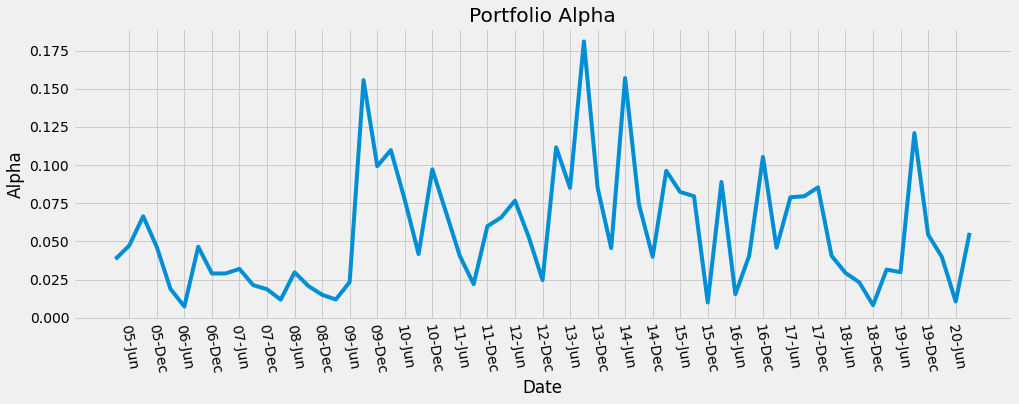

In [141]:
fig = plt.figure(figsize=(15,5))
plt.plot(weights_data.date, alphas)
plt.title('Portfolio Alpha')
plt.ylabel('Alpha')
plt.xlabel('Date')
plt.xticks(weights_data.date[1::2], labels=weights_data.date[1::2].dt.strftime('%y-%b'), rotation=-80)
plt.show()

### Correlation

In [150]:
returns_data.corr()

,actual_ret,expected_ret,sharpe
actual_ret,1.000000,0.324174,-0.103559
expected_ret,0.324174,1.000000,-0.124064
sharpe,-0.103559,-0.124064,1.000000


In [149]:
offset = 4
np.corrcoef(returns_data.actual_ret[offset:], returns_data.expected_ret[:-offset])

array([[1.        , 0.14627708],
       [0.14627708, 1.        ]])